In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap, FastMarkerCluster

In [3]:
df = pd.read_csv("zomato.csv")
.

# Data Exploration

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.drop("dish_liked",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  cuisines                     51672 non-null  object
 11  approx_cost(for two people)  51371 non-null  object
 12  reviews_list                 51717 non-null  object
 13  menu_item                    51

In [9]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [10]:
df.isna().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
phone                          1208
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

# Data Cleaning

In [11]:
# Duplicated Values
print(f"duplicated values : {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


duplicated values : 0


In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"},inplace=True)
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [14]:
# clean rate column
rateColumn = df["rate"]

rateColumn = rateColumn.apply(lambda x : x.split("/")[0])
rateColumn = rateColumn.apply(lambda x : 0.0 if x == "NEW" or x =="-" else x)
rateColumn
rateColumn.unique()


array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0.0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [15]:
df["rate"] = rateColumn
df = df.loc[df.rate != 0.0]
df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [16]:
# Adjust datatype of columns to correct datatype
df = df.astype({"rate":"float64"})


In [17]:
cost = df["cost"]
cost = cost.astype(str)
cost = cost.apply(lambda X : X.replace(",",""))
cost = cost.astype("int64")
cost.unique()
df["cost"] = cost


In [18]:
#Copy Dataframe to another frame
df.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199, 1100, 1600,  230,  130, 1700, 1350, 2200, 1400, 2000, 1800,
       1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,   40, 1250,
       3500, 4000, 2400, 2600, 1450,   70, 3200,  240, 6000, 1050, 2300,
       4100,  120, 5000, 3700, 1650, 2700, 4500,   80], dtype=int64)

# Exploratory Data Analysis

Text(0.5, 1.0, 'location')

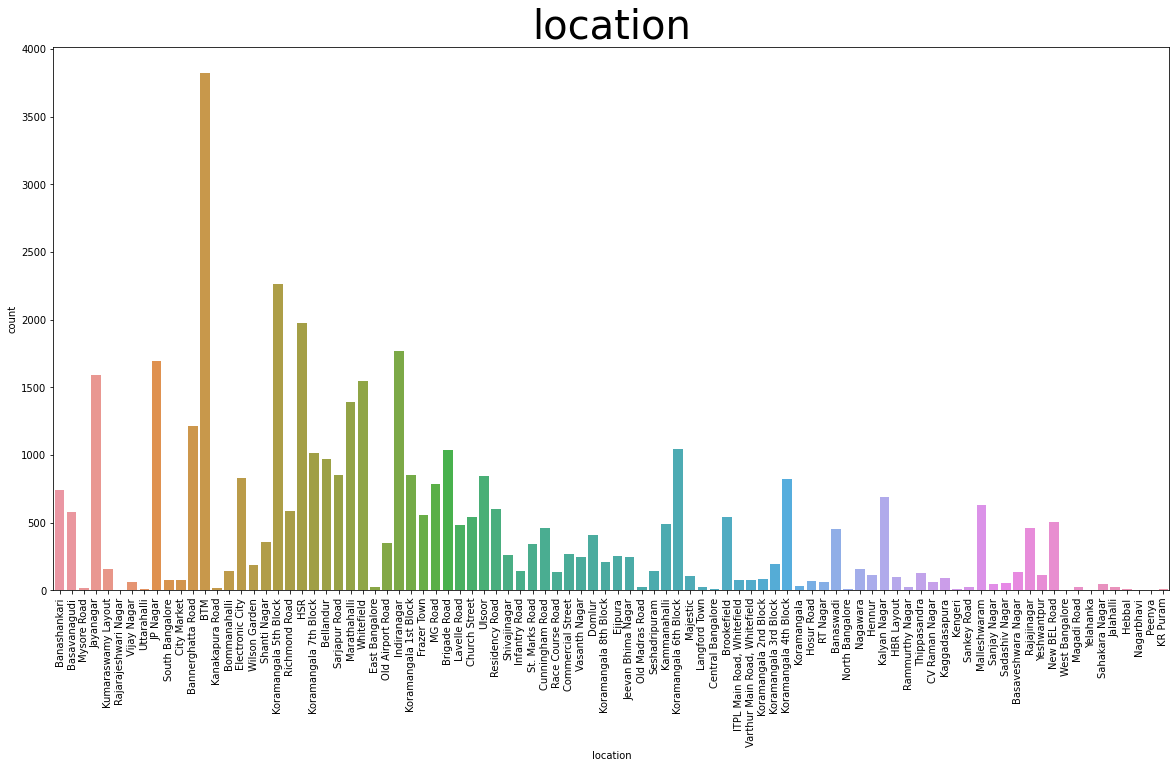

In [46]:
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.countplot(x=df["location"],data=df)
plt.title("location",size=40)

Text(0.5, 1.0, 'rest_type')

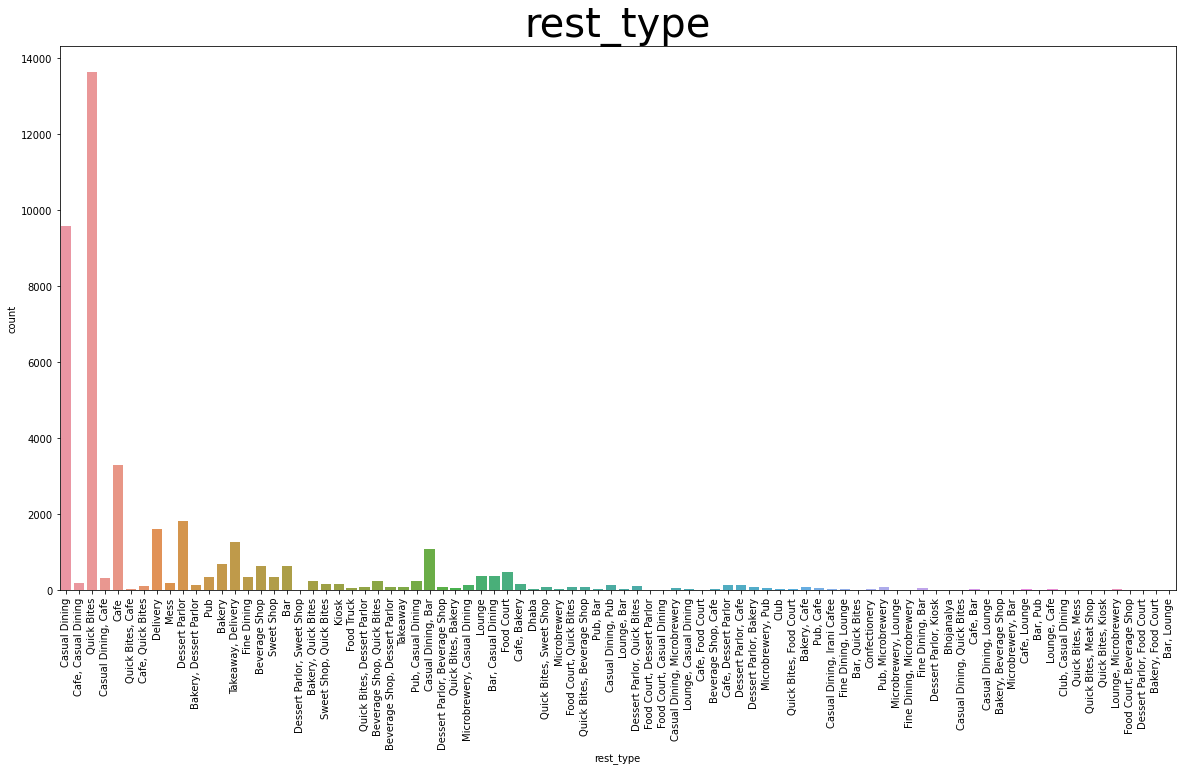

In [45]:
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.countplot(x=df["rest_type"],data=df)
plt.title("rest_type",size=40)


Text(0.5, 1.0, 'city')

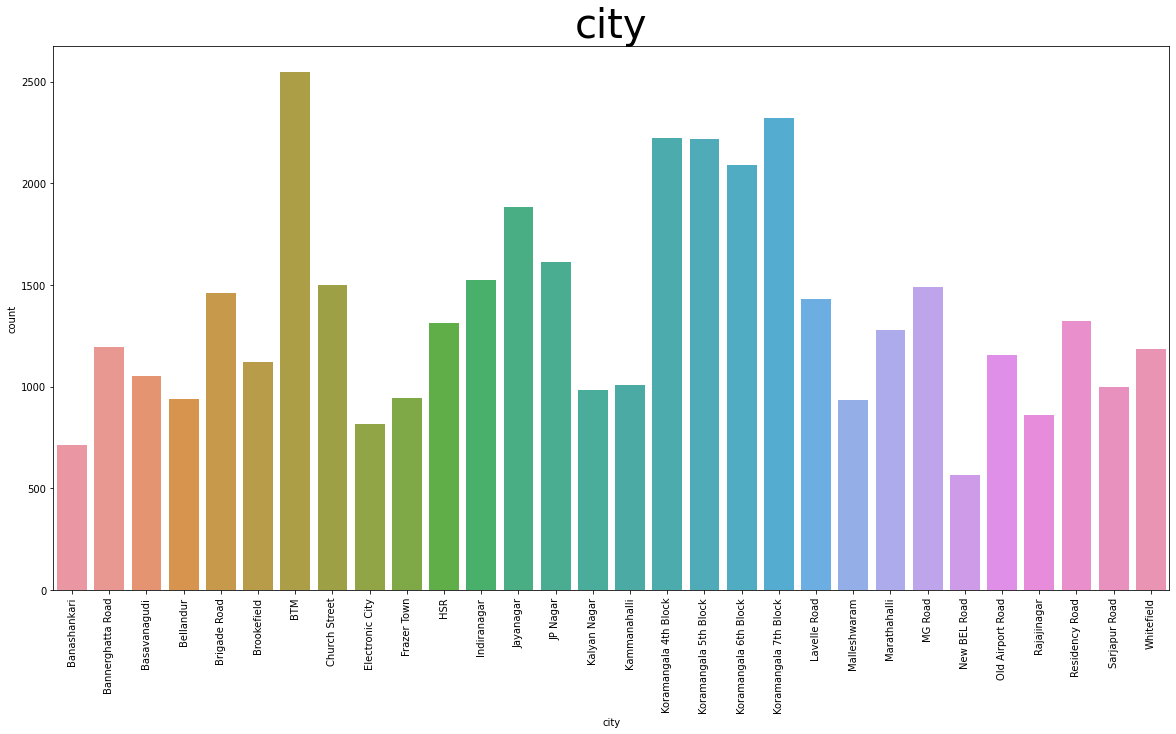

In [44]:
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
sns.countplot(x=df["city"],data=df)
plt.title("city",size=40)

Text(0.5, 1.0, 'Online Order')

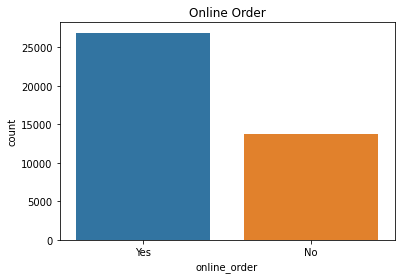

In [23]:
sns.countplot(x=df["online_order"],data=df)
plt.title("Online Order")

Text(0.5, 1.0, 'Book table')

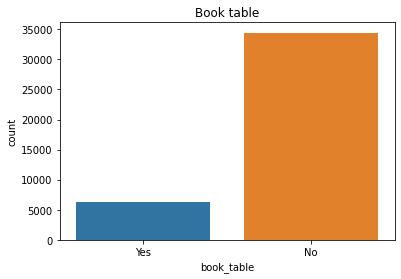

In [24]:
sns.countplot(x=df["book_table"],data=df)
plt.title("Book table")

Text(0, 0.5, 'Restaurant Name')

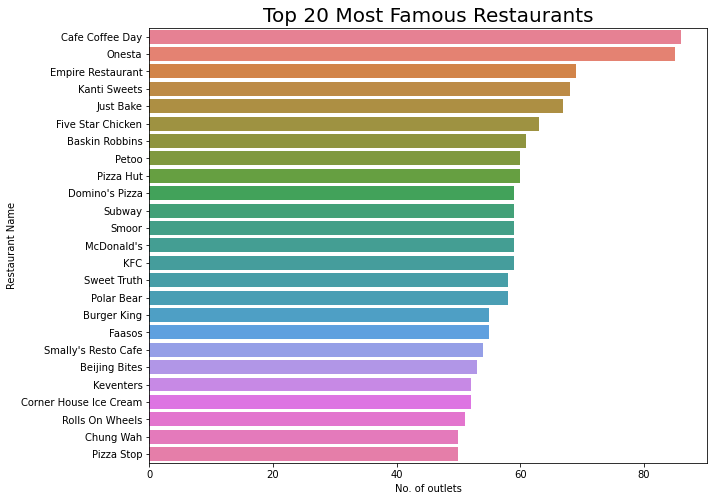

In [25]:
plt.figure(figsize=[10,8])
chain = df["name"].value_counts()[:25]

sns.barplot(x=chain,y=chain.index,palette="husl")

plt.title("Top 20 Most Famous Restaurants", size=20)
plt.xlabel("No. of outlets")
plt.ylabel("Restaurant Name")

C:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Restaurant Name')

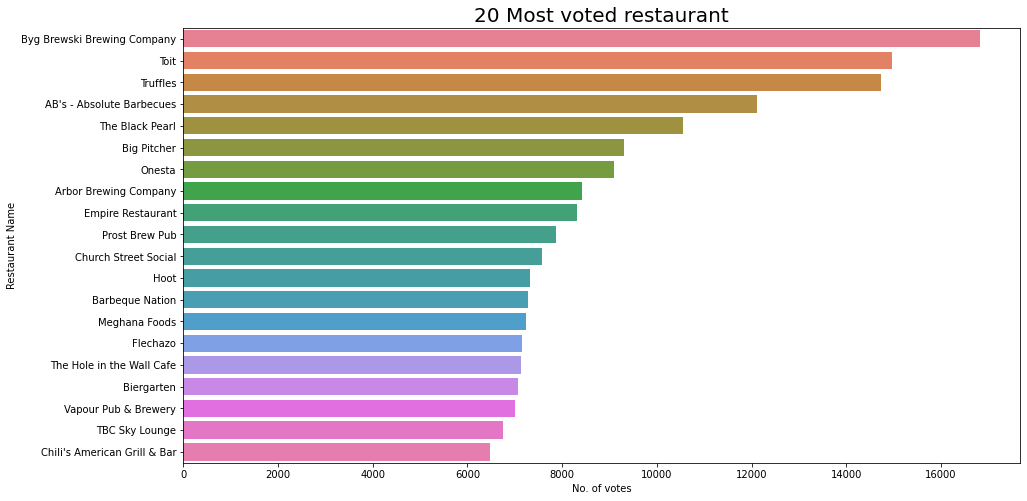

In [47]:
x = df.groupby("name")["votes"].max().nlargest(20)
y = df.groupby("name")["votes"].max().nlargest(20).index

plt.figure(figsize=[15,8])
sns.barplot(x,y,palette="husl")
plt.title("20 Most voted restaurant", size=20)
plt.xlabel("No. of votes")
plt.ylabel("Restaurant Name")

C:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'cuisine')

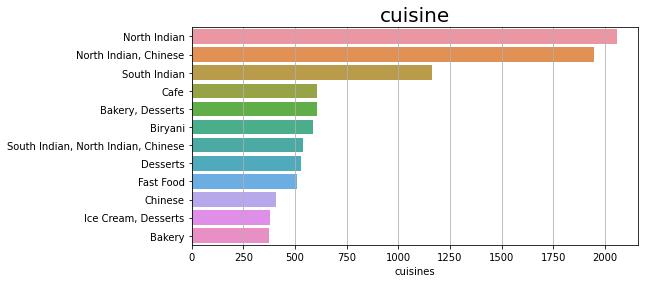

In [48]:
cuisine = df["cuisines"].value_counts()[:12]
plt.figure(figsize=(8,4))
plt.grid(True)
sns.barplot(cuisine,cuisine.index)
plt.title("cuisine",size=20)

In [49]:
print(f"mean cost for eating for 2 person = {df.cost.mean()}")

mean cost for eating for 2 person = 606.0180401602478


C:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([2.7911e+04, 9.1280e+03, 2.6070e+03, 5.9600e+02, 3.6600e+02,
        4.0000e+01, 3.4000e+01, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  40.,  636., 1232., 1828., 2424., 3020., 3616., 4212., 4808.,
        5404., 6000.]),
 <BarContainer object of 10 artists>)

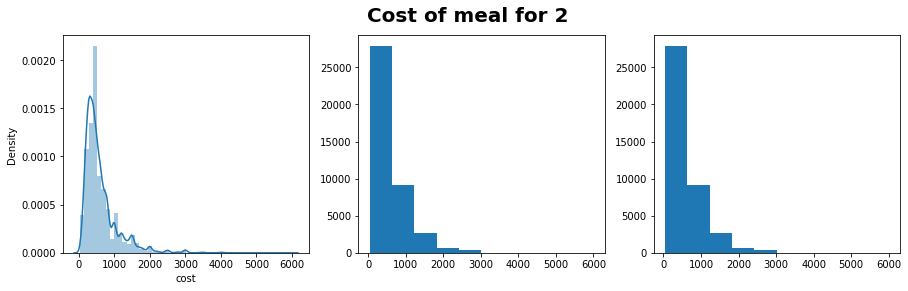

In [50]:
plt.figure(figsize=(15,4))
plt.suptitle("Cost of meal for 2", fontweight="bold", fontsize=20)



plt.subplot(1,3,1)
sns.distplot(df["cost"])

plt.subplot(1,3,2)
plt.hist(x=df["cost"])

plt.subplot(1,3,3)
plt.hist(x=df["cost"])

C:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([3.8578e+04, 1.4280e+03, 4.5300e+02, 6.2000e+01, 1.0000e+02,
        2.8000e+01, 1.3000e+01, 2.0000e+00, 1.7000e+01, 6.0000e+00]),
 array([    0. ,  1683.2,  3366.4,  5049.6,  6732.8,  8416. , 10099.2,
        11782.4, 13465.6, 15148.8, 16832. ]),
 <BarContainer object of 10 artists>)

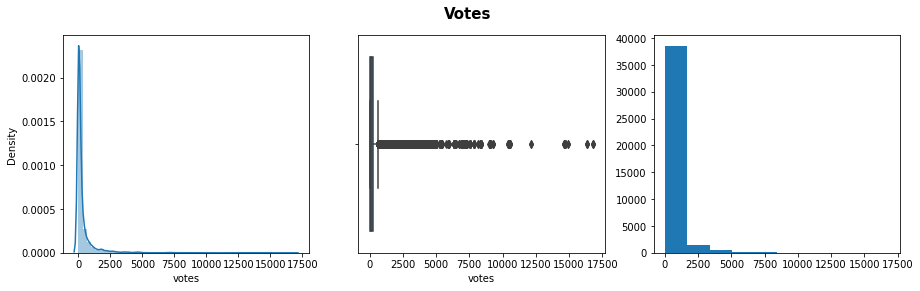

In [51]:
plt.figure(figsize=(15,4))
plt.suptitle("Votes", fontweight="bold",fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df["votes"])

plt.subplot(1,3,2)
sns.boxplot(x=df["votes"])

plt.subplot(1,3,3)
plt.hist(df["votes"])

C:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([   40.,   143.,   632.,  2352.,  5534.,  8371., 11493.,  8102.,
         3438.,   582.]),
 array([1.8 , 2.11, 2.42, 2.73, 3.04, 3.35, 3.66, 3.97, 4.28, 4.59, 4.9 ]),
 <BarContainer object of 10 artists>)

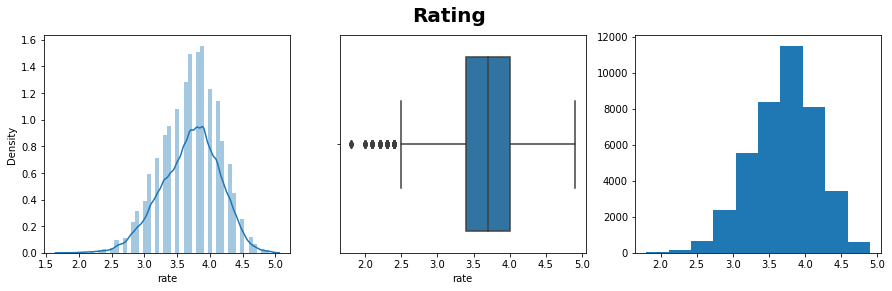

In [52]:
plt.figure(figsize=(15,4))
plt.suptitle("Rating", fontweight="bold", fontsize= 20)

plt.subplot(1,3,1)
sns.distplot(df["rate"])

plt.subplot(1,3,2)
sns.boxplot(x=df["rate"])

plt.subplot(1,3,3)
plt.hist(df["rate"])

# Geospatial Analysis

In [53]:
geolocator = Nominatim(user_agent="app")

In [54]:
locations = pd.DataFrame({"Name":df["location"].unique()})

lat = []
lon = []
for location in locations["Name"]:
    location = geolocator.geocode(location)

    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

locations["lat"] = lat
locations["lon"] = lon

In [55]:
locations.head()

,Name,lat,lon
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.387214,76.666963
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318


In [56]:
rest_locations = pd.DataFrame(df["location"].value_counts().reset_index())

In [57]:
rest_locations.columns = ["Name","count"]
rest_locations

,Name,count
0,BTM,3825
1,Koramangala 5th Block,2262
2,HSR,1976
3,Indiranagar,1770
4,JP Nagar,1691
...,...,...
87,Yelahanka,4
88,West Bangalore,3
89,Rajarajeshwari Nagar,2
90,Nagarbhavi,1


In [58]:
print(locations.shape)
print(rest_locations.shape)

(92, 3)
(92, 2)


In [59]:
restaurant_locations = rest_locations.merge(locations, on="Name", how = "left").dropna()
restaurant_locations.head()

,Name,count,lat,lon
0,BTM,3825,45.954851,-112.496595
1,Koramangala 5th Block,2262,12.934377,77.628415
2,HSR,1976,18.147500,41.538889
3,Indiranagar,1770,12.973291,77.640467
4,JP Nagar,1691,12.265594,76.646540


In [60]:
restaurant_locations["count"].max()

3825

In [61]:
#### Bengaluru Coordinates - (12.9716° N, 77.5946° E)
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(width=550, height=350,location=default_location, zoom_start=default_zoom_start)
    return base_map

In [62]:
def generateMap(default_location = [12.97,77.59], default_zoom_start = 12):
    map = folium.Map(location=default_location, zoom_start=default_zoom_start, min_zoom=7, max_zoom=14)
    return map

In [63]:
basemap = generateMap()

In [64]:
restaurant_locations[["lat","lon","count"]]

,lat,lon,count
0,45.954851,-112.496595,3825
1,12.934377,77.628415,2262
2,18.147500,41.538889,1976
3,12.973291,77.640467,1770
4,12.265594,76.646540,1691
...,...,...,...
87,13.100698,77.596345,4
88,13.001129,77.632562,3
89,12.927441,77.515522,2
90,12.954674,77.512172,1


# Heatmap for Restaurants in Bengaluru :

In [65]:
HeatMap(restaurant_locations[["lat","lon","count"]], zoom = 20, radius = 15).add_to(basemap)
basemap

# Marker Cluster Map for Restaurants in Begaluru

In [66]:
FastMarkerCluster(data = restaurant_locations[["lat","lon","count"]].values.tolist()).add_to(basemap)
basemap